Fonte: https://www.analyticsvidhya.com/blog/2021/07/classification-of-handwritten-digits-using-cnn/

Salvar modelo: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

Carregar modelo: https://www.tensorflow.org/js/tutorials/conversion/import_keras

In [ ]:
!pip install --no-deps tensorflowjs
import tensorflowjs as tfjs

     |████████████████████████████████| 77 kB 3.2 MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd 
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from collections import Counter
from scipy.interpolate import make_interp_spline
sns.set()
plt.rcParams['image.cmap'] = 'gray'

In [7]:
def countSamplesByClass(df):
  lettersCount = Counter(df)
  plt.figure(figsize=(10,10))
  plt.barh(list(lettersCount.keys()), list(lettersCount.values()))
  plt.title('Quantidade de amostras por letras')
  plt.xlabel('Quantidade de amostras')
  plt.ylabel('Letras')
  plt.show()

In [8]:
def createSpline(x, y):
  X_Y_Spline = make_interp_spline(x, y)
  X_ = np.linspace(min(x), max(x), 500)
  Y_ = X_Y_Spline(X_)
  return (X_, Y_)

In [9]:
def formatFigure(plt):
  plt.grid(False)
  plt.axvline(x=0, c="black", linewidth=1)
  plt.axhline(y=0, xmin=0.05, c="black", linewidth=2)
  ax = plt.gca()
  ax.set_ylim([0, 1.025])
  ax.set_facecolor('white')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

In [10]:
# Só deve descomentar 1 opção
#origemImagens = 'originais'
origemImagens = 'originaisLimpas'
#origemImagens = 'aumentoDeDados'
#origemImagens = 'aumentoDeDadosLimpas'

In [11]:
dicionarioNomesArquivos = {
    'originais': ('dataset.csv', 'labels.csv'),
    'originaisLimpas': ('datasetLimpo.csv', 'labelsLimpo.csv'),
    'aumentoDeDados': ('datasetExpandido.csv', 'labelsExpandido.csv'),
    'aumentoDeDadosLimpas': ('datasetExpandidoLimpo.csv', 'labelsExpandidoLimpo.csv'),
}
(nomeArquivoDataset, nomeArquivoLabels) = dicionarioNomesArquivos[origemImagens]

In [12]:
# Paths para dados
datasetPath = '/content/drive/MyDrive/2021.2/TCC/Testes/Data/DatasetMultiprova/Numeros/' + nomeArquivoDataset
labelsPath = '/content/drive/MyDrive/2021.2/TCC/Testes/Data/DatasetMultiprova/Numeros/' + nomeArquivoLabels
pathToModel = '/content/drive/MyDrive/2021.2/TCC/Modelos/Numeros3Canais/Base'
pathToModelJs = '/content/drive/MyDrive/2021.2/TCC/Modelos/Numeros3Canais/Js'

In [13]:
shapeImg = (32, 32, 3)
quantidadeDeCanais = shapeImg[2]
quantidadeDeClasses = 11

In [14]:
# Carregar dados
dataframe = pd.read_csv(datasetPath).astype('float32')
labels = pd.read_csv(labelsPath, squeeze=True).astype('float32')

In [15]:
print('Quantidade de amostras:', len(dataframe))

Quantidade de amostras: 18980


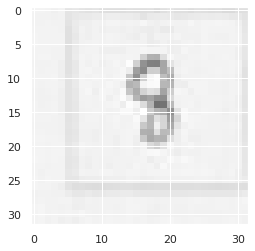

Index: 14329 , Label: 8.0


In [16]:
randomIndex = random.randint(0, len(dataframe))
testImg = dataframe.iloc[randomIndex]
testImg = np.array(testImg).reshape(shapeImg[0], shapeImg[1], quantidadeDeCanais)
plt.imshow(testImg)
plt.show()
print('Index:', randomIndex, ', Label:', labels.iloc[randomIndex])

In [17]:
# Separação dos datasets em treinamento, validação e teste
shapedDataframe = dataframe.to_numpy().reshape(-1, shapeImg[0], shapeImg[1], quantidadeDeCanais)
shapedLabels = labels.to_numpy()
X_train, X_temp, y_train, y_temp = train_test_split(shapedDataframe, shapedLabels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

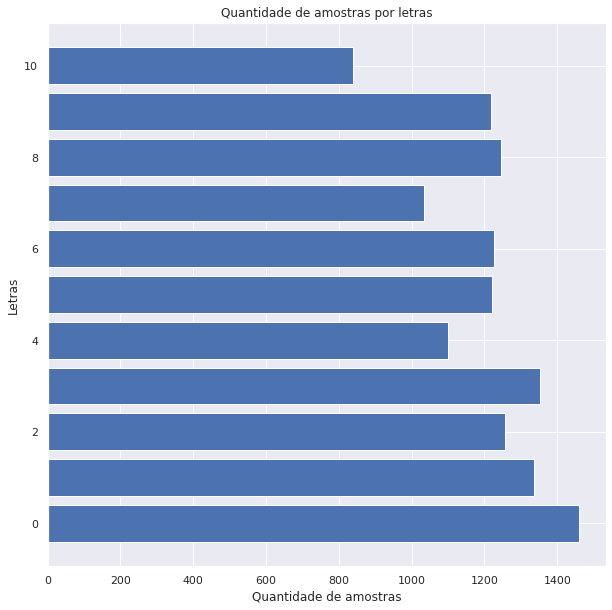

In [18]:
countSamplesByClass(y_train)

In [37]:
CNN = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(shapeImg[0], shapeImg[1], quantidadeDeCanais)), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPooling2D((1, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(quantidadeDeClasses, activation='softmax')
])
CNN.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# (OPCIONAL) Resumo da CNN
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [38]:
epochs = 30
history = CNN.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=2)

Epoch 1/30
416/416 - 5s - loss: 1.6808 - accuracy: 0.4018 - val_loss: 0.7778 - val_accuracy: 0.7460 - 5s/epoch - 11ms/step
Epoch 2/30
416/416 - 4s - loss: 0.5369 - accuracy: 0.8303 - val_loss: 0.3561 - val_accuracy: 0.8967 - 4s/epoch - 10ms/step
Epoch 3/30
416/416 - 3s - loss: 0.2958 - accuracy: 0.9072 - val_loss: 0.3148 - val_accuracy: 0.9069 - 3s/epoch - 8ms/step
Epoch 4/30
416/416 - 3s - loss: 0.2044 - accuracy: 0.9362 - val_loss: 0.2366 - val_accuracy: 0.9298 - 3s/epoch - 8ms/step
Epoch 5/30
416/416 - 3s - loss: 0.1604 - accuracy: 0.9479 - val_loss: 0.1468 - val_accuracy: 0.9596 - 3s/epoch - 8ms/step
Epoch 6/30
416/416 - 3s - loss: 0.1228 - accuracy: 0.9610 - val_loss: 0.1866 - val_accuracy: 0.9456 - 3s/epoch - 8ms/step
Epoch 7/30
416/416 - 3s - loss: 0.1014 - accuracy: 0.9673 - val_loss: 0.1268 - val_accuracy: 0.9645 - 3s/epoch - 8ms/step
Epoch 8/30
416/416 - 3s - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.1222 - val_accuracy: 0.9603 - 3s/epoch - 8ms/step
Epoch 9/30
416/416 - 3

In [39]:
# Validar rede com conjunto de teste
CNN.evaluate(X_test, y_test)

89/89 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 0.9772


[0.09675967693328857, 0.9771689772605896]

In [ ]:
# (OPCIONAL) Salvar modelo
CNN.save(pathToModel)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021.2/TCC/Modelos/Numeros3Canais/TesteLimpo/assets


In [ ]:
# (OPCIONAL) Exportar modelo para tensorflowJs
tfjs.converters.save_keras_model(CNN, pathToModelJs)

In [40]:
# Array de valores em X para tracar a spline dos gráficos
xAxis = [index for index in range(0, epochs)]

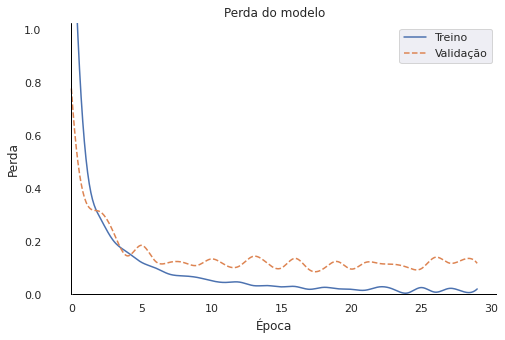

In [41]:
# (OPCIONAL) Gráfico de perda
Xloss, Yloss = createSpline(xAxis, history.history['loss'])
Xvalloss, Yvalloss = createSpline(xAxis, history.history['val_loss'])
plt.figure(figsize=(8, 5))
plt.plot(Xloss, Yloss)
plt.plot(Xvalloss, Yvalloss, '--')
formatFigure(plt)
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.show()

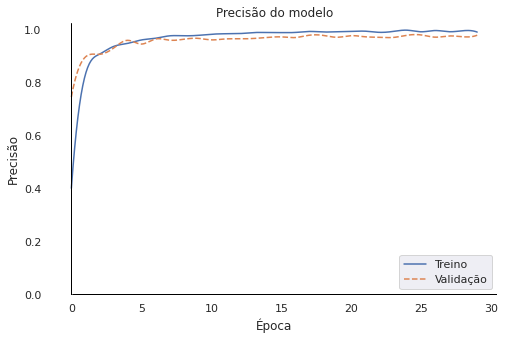

In [42]:
# (OPCIONAL) Gráfico de precisão
plt.figure(figsize=(8, 5))
Xacc, Yacc = createSpline(xAxis, history.history['accuracy'])
Xvalacc, Yvalacc = createSpline(xAxis, history.history['val_accuracy'])
plt.plot(Xacc, Yacc)
plt.plot(Xvalacc, Yvalacc, '--')
formatFigure(plt)
plt.title('Precisão do modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

In [43]:
preditedValuesTest = CNN.predict(X_test)
formatedPredictedValues = [scores.argmax() for scores in preditedValuesTest]

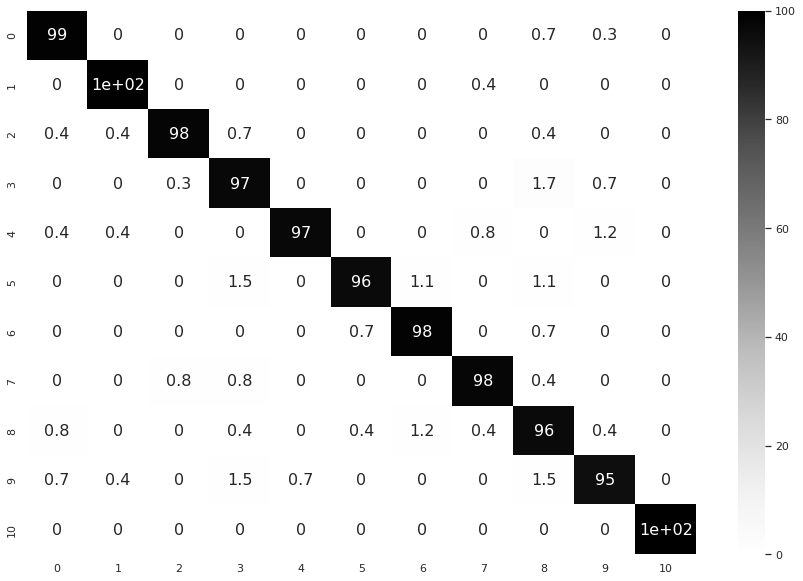

In [44]:
cm = confusion_matrix(y_test, formatedPredictedValues, normalize='true') * 100
cmRounded = [[round(num, 1) for num in line] for line in cm]
df_cm = pd.DataFrame(cmRounded, range(quantidadeDeClasses), range(quantidadeDeClasses))
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Greys')

In [ ]:
# (OPCIONAL) Carregar modelo
CNN = load_model(pathToModel)

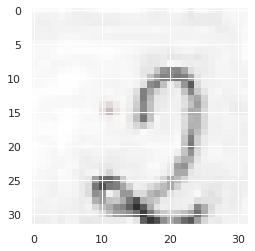

9 99.97822570800781%
[3.9877277e-03 4.0767611e-07 1.0278163e-10 1.9238507e-06 2.7053465e-08
 1.7761637e-02 1.3438929e-12 1.1186630e-10 2.4395073e-05 9.9978226e+01
 5.4431655e-16]


In [45]:
# (OPCIONAL) Carregar imagem e realizar predição
pathToImg = '/content/drive/MyDrive/2021.2/TCC/Testes/Data/LetrasCartaoTeste/matricula-10-0.png'
baseImg = cv2.imread(pathToImg, cv2.IMREAD_COLOR)
maxColorBaseImg = max(baseImg.flatten())
baseImgNormalized = baseImg / maxColorBaseImg
resizedBaseImage = cv2.resize(baseImgNormalized, (shapeImg[0], shapeImg[1]))

testImage = np.array(resizedBaseImage).reshape(-1, shapeImg[0], shapeImg[1], quantidadeDeCanais)
plt.imshow(resizedBaseImage)
plt.show()
y_predicted = CNN.predict(testImage)
predictScores = y_predicted[0] * 100
winnerIdx = np.argmax(predictScores)
print(winnerIdx, '{}%'.format(predictScores[winnerIdx]))
print(predictScores)